In [14]:
import os
import shutil
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
# --- Configuration ---
source_dir = Path("/Users/quinnmackay/Documents/GitHub/BICC/Paleochrono BICC Work/Paleochrono BICC Experiment/BICC2025")
destination_dir = Path('/Users/quinnmackay/Desktop/all_depos')
type='deposition'

# Ensure destination exists
destination_dir.mkdir(parents=True, exist_ok=True)

# Walk through all files recursively
for path in source_dir.rglob(f"{type}.txt"):
    # Create a unique destination filename if there's a conflict
    parent_name = path.parent.name
    dest_file = destination_dir / f"{parent_name}_{path.name}"

    # Copy file
    shutil.copy2(path, dest_file)
    print(f"Copied: {path} -> {dest_file}")

print(f"✅ Done! All {type}.txt files have been copied.")


Copied: /Users/quinnmackay/Documents/GitHub/BICC/Paleochrono BICC Work/Paleochrono BICC Experiment/BICC2025/GISP2/deposition.txt -> /Users/quinnmackay/Desktop/all_depos/GISP2_deposition.txt
Copied: /Users/quinnmackay/Documents/GitHub/BICC/Paleochrono BICC Work/Paleochrono BICC Experiment/BICC2025/DF/deposition.txt -> /Users/quinnmackay/Desktop/all_depos/DF_deposition.txt
Copied: /Users/quinnmackay/Documents/GitHub/BICC/Paleochrono BICC Work/Paleochrono BICC Experiment/BICC2025/EDML/deposition.txt -> /Users/quinnmackay/Desktop/all_depos/EDML_deposition.txt
Copied: /Users/quinnmackay/Documents/GitHub/BICC/Paleochrono BICC Work/Paleochrono BICC Experiment/BICC2025/EDC/deposition.txt -> /Users/quinnmackay/Desktop/all_depos/EDC_deposition.txt
Copied: /Users/quinnmackay/Documents/GitHub/BICC/Paleochrono BICC Work/Paleochrono BICC Experiment/BICC2025/NGRIP/deposition.txt -> /Users/quinnmackay/Desktop/all_depos/NGRIP_deposition.txt
Copied: /Users/quinnmackay/Documents/GitHub/BICC/Paleochrono B

In [16]:
# --- Load all copied files into pandas DataFrames ---
dataframes = {}

for file in destination_dir.glob(f"*{type}.txt"):
    # Use the prefix (parent name) as the key
    key = file.name.replace(f"_{type}.txt", "")
    try:
        df = pd.read_csv(file, delim_whitespace=True, comment='#')
        dataframes[key] = df
        print(f"Loaded {file.name} ({len(df)} rows)")
    except Exception as e:
        print(f"⚠️ Could not read {file.name}: {e}")

print("\n✅ All readable deposition files loaded into 'dataframes' dict.")

Loaded EDML_deposition.txt (2547 rows)
Loaded NGRIP_deposition.txt (3077 rows)
Loaded DF_deposition.txt (54045 rows)
Loaded WDC_deposition.txt (6781 rows)
Loaded GISP2_deposition.txt (12330 rows)
Loaded GRIP_deposition.txt (14206 rows)
Loaded EDC_deposition.txt (1936 rows)

✅ All readable deposition files loaded into 'dataframes' dict.


/var/folders/cd/1mh45k3j19g5g_kxkz_17xvc0000gn/T/ipykernel_63219/1594767102.py:8: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file, delim_whitespace=True, comment='#')
/var/folders/cd/1mh45k3j19g5g_kxkz_17xvc0000gn/T/ipykernel_63219/1594767102.py:8: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file, delim_whitespace=True, comment='#')
/var/folders/cd/1mh45k3j19g5g_kxkz_17xvc0000gn/T/ipykernel_63219/1594767102.py:8: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv(file, delim_whitespace=True, comment='#')
/var/folders/cd/1mh45k3j19g5g_kxkz_17xvc0000gn/T/ipykernel_63219/1594767102.py:8: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is

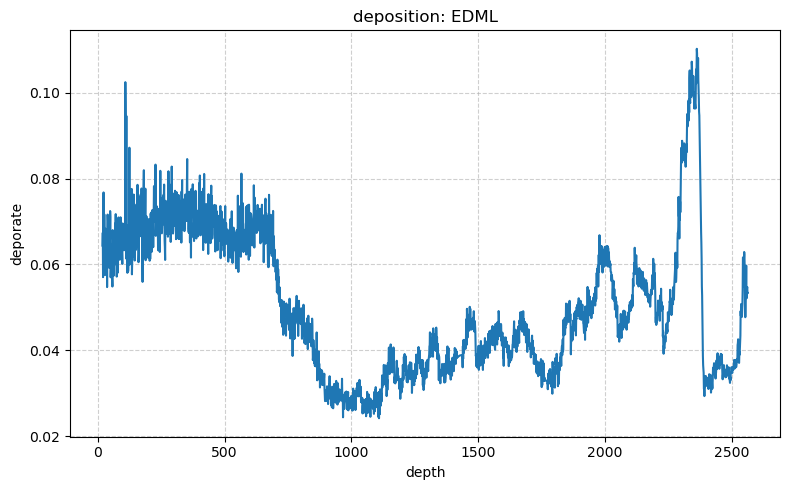

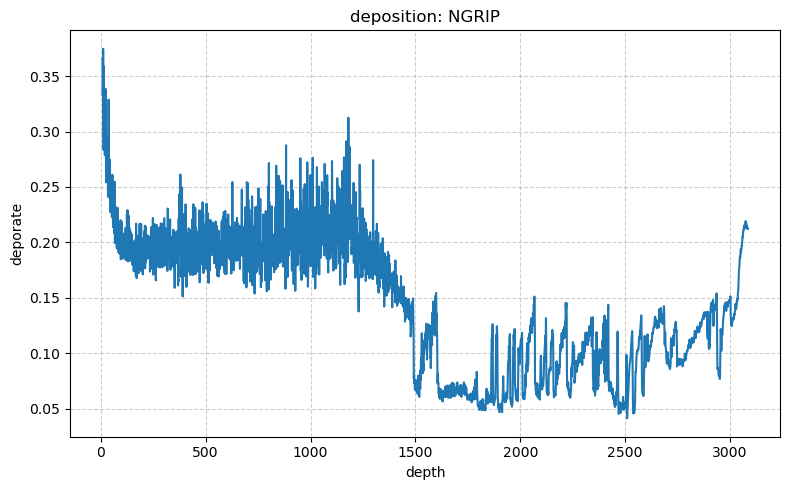

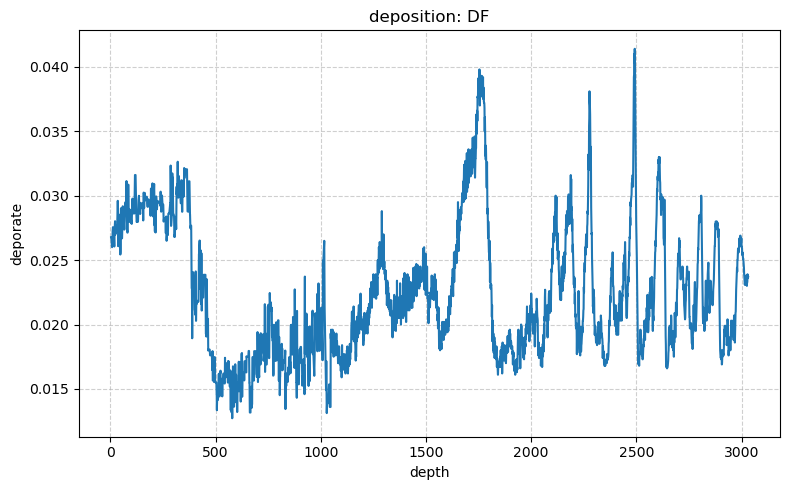

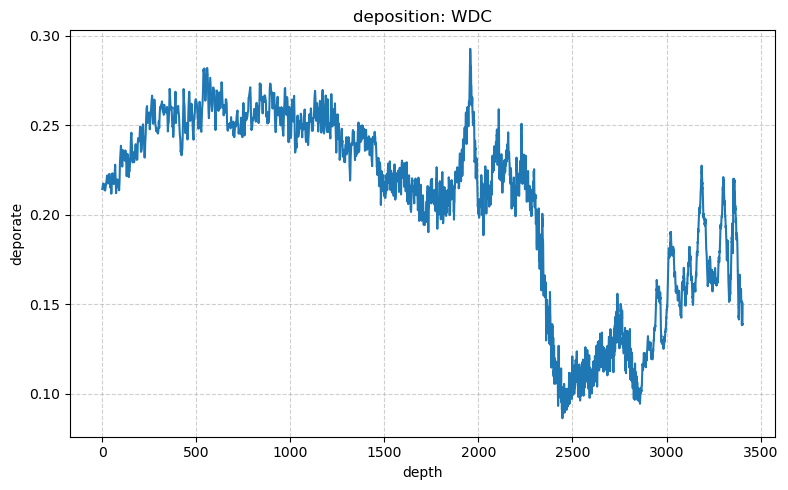

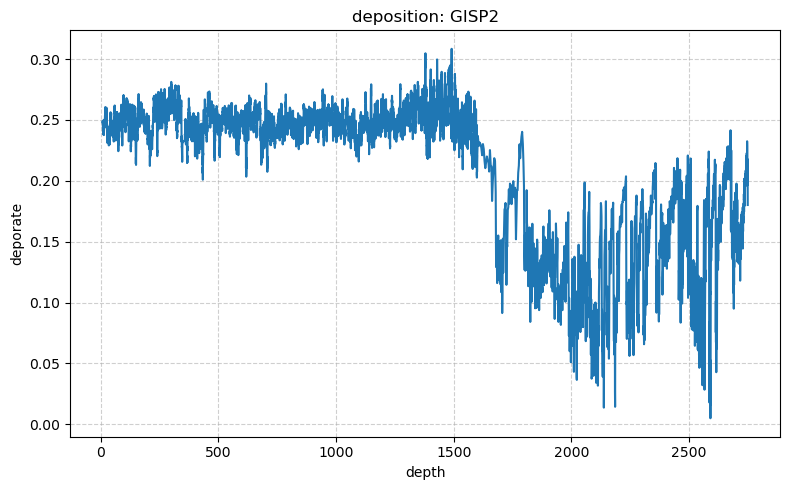

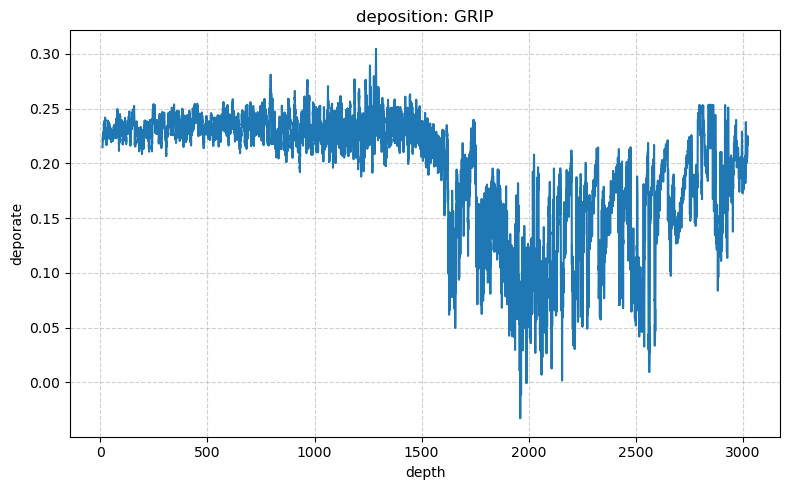

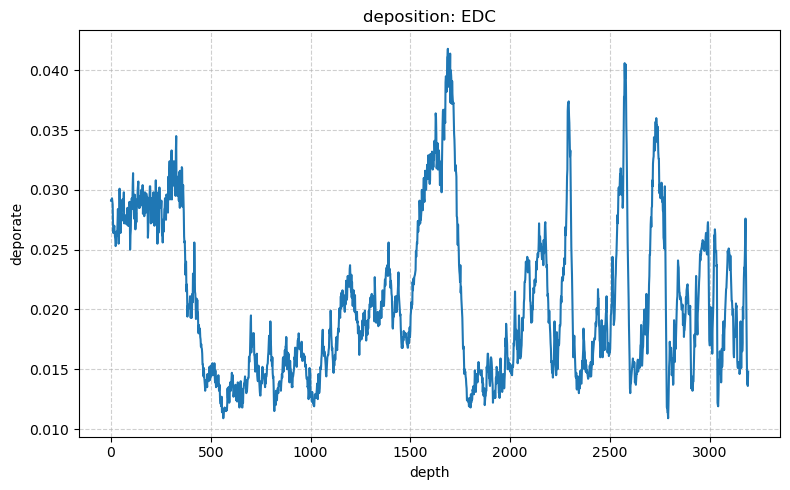

In [17]:
# --- Plot each deposition separately ---
for name, df in dataframes.items():
    plt.figure(figsize=(8, 5))
    
    # Try to plot first two numeric columns if possible
    numeric_cols = df.select_dtypes(include="number").columns
    if len(numeric_cols) >= 2:
        x, y = numeric_cols[:2]
        plt.plot(df[x], df[y], linestyle='-')
        plt.xlabel(x)
        plt.ylabel(y)
        plt.title(f"{type}: {name}")
        plt.grid(True, linestyle='--', alpha=0.6)
        plt.tight_layout()
        plt.show()
    else:
        print(f"⚠️ Skipping {name}: not enough numeric columns to plot.")